# Logisitc Regression Model using SK-Learn

In [1]:
import numpy as np
from numpy.random import randn
from numpy.matlib import repmat
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.special import erf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
# Utility for displaying our DataFrames
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
"""
-- K is the number of variables on the CV; Respondents is the number of firms (set to 1 for an example now); Options is the number of CVs to be assessed.
-- Params are the 'true' weights that are being attached to each of the K characteristics by each firm.
-- y is a 'yes/no' decision (binary) on whether they say that they would or would not interview each intern.
-- EstPredictedProb is a separate function that estimates a probit, firm by firm, and then predicts the probabilities.
-- The last line ('scatter') is just visualising the 'true' probability of interview against the estimated probability.
-- If you dig into EstPredictedProb and then ProbitLL, you will see the last term of LL -- i.e this is where I'm imposing the prior on the parameters, by way of a penalty 
"""


K = 5; # Number of variables on CV
Respondents = 1; # Number of open jobs
Options = 50; # Number of job seekers

# %% First, draw parameters...

Params = randn(Respondents, K) # True weights for CV variables
ID = 1 # Dunno
BigParams = repmat(Params, Options, 1)
BigID = repmat(ID, Options, 1)




# %% Second, draw data...
X = randn(Respondents * Options, K)
X[:, 0] = 1

# %% Third, simulate the outcome...
xhat = np.sum(np.multiply(X, BigParams), axis=1)
trueprob = norm.cdf(xhat)
epsilon = randn(Respondents * Options, 1).reshape(Options)

y = (xhat + epsilon >= 0) # True/False table on whether firm will interview candidate


In [9]:
pdx = pd.DataFrame(X)
pdy = pd.DataFrame(y)

model = LogisticRegression()
model = model.fit(X, y)

score = model.score(X, y)

#### Model's R^2 Score: {{score}}

### Now let's split our data set into a train and test set and fit a new model onto it

In [5]:
test_size = 0.4
begin_index = int(len(y) - y.size * test_size)
end_index = int(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, 
                                                    shuffle=False)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Below is some information regarding how well our model performs

In [6]:
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)

print('Accuracy', metrics.accuracy_score(y_test, predicted))
print('Receiver operating characteristic score', metrics.roc_auc_score(y_test, probs[:, 1]))
print(metrics.classification_report(y_test, predicted))

Accuracy 0.8
Receiver operating characteristic score 0.8933333333333333
             precision    recall  f1-score   support

      False       0.56      1.00      0.71         5
       True       1.00      0.73      0.85        15

avg / total       0.89      0.80      0.81        20



### Comparison of our predictions vs the true generated probabilities

In [10]:
display_side_by_side(pd.DataFrame(probs.T[1], columns=['trueprob']), 
                     pd.DataFrame(trueprob[begin_index:end_index], columns=['predprob']))

,trueprob
0,0.624803
1,0.485065
2,0.345809
3,0.440431
4,0.728114
5,0.874230
6,0.119816
7,0.959057
8,0.241723
9,0.944502


### Lastly a nice graph showing off the two

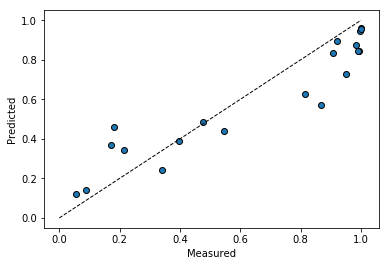

In [11]:
ig, ax = plt.subplots()
predprobs = probs.T[1]
trueprobs = trueprob[begin_index:end_index]
ax.scatter(trueprobs, predprobs, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()